In [1]:
import tensorflow as tf
import pandas as pd
import keras
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
a=tf.range(10)
a1=tf.data.Dataset.from_tensor_slices(a)
a1

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [3]:
for item in a1:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [4]:
a=tf.Variable([[12,23,34],[45,36,23]])
a

<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[12, 23, 34],
       [45, 36, 23]])>

In [5]:
a1=tf.data.Dataset.from_tensor_slices(a)
for item in a1:
    print(item)

tf.Tensor([12 23 34], shape=(3,), dtype=int32)
tf.Tensor([45 36 23], shape=(3,), dtype=int32)


In [6]:
a=tf.range(10)
dataset=tf.data.Dataset.from_tensor_slices(a)

In [7]:
dataset_batch=dataset.repeat(5).batch(7,drop_remainder=True)
for item in dataset_batch:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9 0 1 2 3 4], shape=(7,), dtype=int32)
tf.Tensor([5 6 7 8 9 0 1], shape=(7,), dtype=int32)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int32)


# lets do some filter of the data

In [8]:
dataset_batch=dataset_batch.map(lambda x:x*2)
for item in dataset_batch:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int32)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)
tf.Tensor([16 18  0  2  4  6  8], shape=(7,), dtype=int32)
tf.Tensor([10 12 14 16 18  0  2], shape=(7,), dtype=int32)
tf.Tensor([ 4  6  8 10 12 14 16], shape=(7,), dtype=int32)


In [9]:
dataset_batch=dataset_batch.unbatch()

In [10]:
dataset_batch.filter(lambda x:x<10)

<_FilterDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [11]:
for item in dataset_batch.take(5):
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)


In [12]:
data_shufle=tf.data.Dataset.range(10).repeat(3)
data_shufle=data_shufle.shuffle(buffer_size=3,seed=42).batch(7)
for item in data_shufle:
    print(item)

tf.Tensor([0 3 4 2 1 5 8], shape=(7,), dtype=int64)
tf.Tensor([6 9 7 2 3 1 4], shape=(7,), dtype=int64)
tf.Tensor([6 0 7 9 0 1 2], shape=(7,), dtype=int64)
tf.Tensor([8 4 5 5 3 8 9], shape=(7,), dtype=int64)
tf.Tensor([7 6], shape=(2,), dtype=int64)


In [13]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

housing_df=fetch_california_housing()
x_train_full,x_test,y_train_full,y_test=train_test_split(housing_df.data,housing_df.target.reshape(-1,1),random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full)

In [14]:
housing_df.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [15]:
standard=StandardScaler()
standard.fit(x_train)

StandardScaler()

In [16]:
x_mean=standard.mean_
x_std=standard.scale_

In [17]:
train_data=np.c_[x_train,y_train]
valid_data=np.c_[x_valid,y_valid]
test_data=np.c_[x_test,y_test]

In [18]:
train_data.shape,valid_data.shape,test_data.shape

((11610, 9), (3870, 9), (5160, 9))

In [19]:
header_cols=housing_df.feature_names+["MedianHouseValue"]

In [20]:
header=",".join(header_cols)

In [21]:
def save_to_multiple_csv_files(data, name_prefix, header=None, n_parts=10):
    housing_dir = os.path.join("datasets", "housing")
    os.makedirs(housing_dir, exist_ok=True)
    path_format = os.path.join(housing_dir, "my_{}_{:02d}.csv")

    filepaths = []
    m = len(data)
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        part_csv = path_format.format(name_prefix, file_idx)
        filepaths.append(part_csv)
        with open(part_csv, "wt", encoding="utf-8") as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                f.write(",".join([repr(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

In [22]:
# lets define a function for spliting our data into multiple files
train_filepath=save_to_multiple_csv_files(train_data,"train",header,n_parts=20)
valid_filepath=save_to_multiple_csv_files(valid_data,"valid",header,n_parts=20)
test_filepath=save_to_multiple_csv_files(test_data,"test",header,n_parts=10)

In [23]:
pd.read_csv(train_filepath[0]).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,2.6576,5.0,5.939206,1.129032,1944.0,2.411911,34.44,-117.22,0.985
1,1.6102,14.0,4.488593,1.142586,1831.0,3.480989,32.74,-117.10,0.934
2,3.7065,36.0,5.235808,1.135371,665.0,2.903930,34.89,-117.05,0.620
3,3.1731,46.0,3.990164,1.055738,662.0,2.170492,33.99,-118.34,1.403
4,4.6687,44.0,5.782016,1.049046,1012.0,2.757493,34.00,-118.40,3.443


In [24]:
with open(train_filepath[0]) as f:
    for i in range(5):
        print(f.readline(),end=" ")

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
 2.6576,5.0,5.939205955334987,1.1290322580645162,1944.0,2.411910669975186,34.44,-117.22,0.985
 1.6102,14.0,4.488593155893536,1.1425855513307985,1831.0,3.4809885931558937,32.74,-117.1,0.934
 3.7065,36.0,5.235807860262009,1.1353711790393013,665.0,2.903930131004367,34.89,-117.05,0.62
 3.1731,46.0,3.9901639344262296,1.0557377049180328,662.0,2.1704918032786886,33.99,-118.34,1.403
 

In [25]:
train_filepath

['datasets\\housing\\my_train_00.csv',
 'datasets\\housing\\my_train_01.csv',
 'datasets\\housing\\my_train_02.csv',
 'datasets\\housing\\my_train_03.csv',
 'datasets\\housing\\my_train_04.csv',
 'datasets\\housing\\my_train_05.csv',
 'datasets\\housing\\my_train_06.csv',
 'datasets\\housing\\my_train_07.csv',
 'datasets\\housing\\my_train_08.csv',
 'datasets\\housing\\my_train_09.csv',
 'datasets\\housing\\my_train_10.csv',
 'datasets\\housing\\my_train_11.csv',
 'datasets\\housing\\my_train_12.csv',
 'datasets\\housing\\my_train_13.csv',
 'datasets\\housing\\my_train_14.csv',
 'datasets\\housing\\my_train_15.csv',
 'datasets\\housing\\my_train_16.csv',
 'datasets\\housing\\my_train_17.csv',
 'datasets\\housing\\my_train_18.csv',
 'datasets\\housing\\my_train_19.csv']

In [26]:
valid_filepath

['datasets\\housing\\my_valid_00.csv',
 'datasets\\housing\\my_valid_01.csv',
 'datasets\\housing\\my_valid_02.csv',
 'datasets\\housing\\my_valid_03.csv',
 'datasets\\housing\\my_valid_04.csv',
 'datasets\\housing\\my_valid_05.csv',
 'datasets\\housing\\my_valid_06.csv',
 'datasets\\housing\\my_valid_07.csv',
 'datasets\\housing\\my_valid_08.csv',
 'datasets\\housing\\my_valid_09.csv',
 'datasets\\housing\\my_valid_10.csv',
 'datasets\\housing\\my_valid_11.csv',
 'datasets\\housing\\my_valid_12.csv',
 'datasets\\housing\\my_valid_13.csv',
 'datasets\\housing\\my_valid_14.csv',
 'datasets\\housing\\my_valid_15.csv',
 'datasets\\housing\\my_valid_16.csv',
 'datasets\\housing\\my_valid_17.csv',
 'datasets\\housing\\my_valid_18.csv',
 'datasets\\housing\\my_valid_19.csv']

# building a pipeline

In [27]:
filepath_dataset=tf.data.Dataset.list_files(train_filepath)

In [28]:
for filepath in filepath_dataset:
    print(filepath)

tf.Tensor(b'datasets\\housing\\my_train_02.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_04.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_05.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_01.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_16.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_10.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_19.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_18.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_11.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_06.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_07.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_03.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_09.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_00.csv', sh

In [29]:
n_readers=5
dataset=filepath_dataset.interleave(
    lambda filepath:tf.data.TextLineDataset(filepath).skip(1),
    cycle_length=n_readers
)

In [30]:
for line in dataset.take(5):
    print(line)
print(type(line))

tf.Tensor(b'4.0023,33.0,5.156944444444444,0.9972222222222222,2106.0,2.925,34.13,-117.88,1.855', shape=(), dtype=string)
tf.Tensor(b'3.274,39.0,5.218503937007874,1.1614173228346456,1103.0,2.171259842519685,33.72,-118.29,2.543', shape=(), dtype=string)
tf.Tensor(b'6.3997,50.0,7.37020316027088,1.1489841986455982,1256.0,2.835214446952596,34.44,-119.72,5.00001', shape=(), dtype=string)
tf.Tensor(b'2.5459,22.0,3.512236286919831,1.0075949367088608,1804.0,1.5223628691983122,37.94,-122.05,1.793', shape=(), dtype=string)
tf.Tensor(b'4.8424,23.0,5.381188118811881,1.0226308345120225,6034.0,4.267326732673268,37.34,-121.82,1.953', shape=(), dtype=string)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [31]:
record_defaults=[0, np.nan, tf.constant(np.nan, dtype=tf.float64), "Hello", tf.constant([])]
parsed_fields = tf.io.decode_csv('1,2,3,4,5', record_defaults)
parsed_fields

[<tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3.0>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'4'>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0>]

In [32]:
parsed_fields=tf.io.decode_csv(",,,,5",record_defaults)
parsed_fields

[<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=nan>,
 <tf.Tensor: shape=(), dtype=float64, numpy=nan>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'Hello'>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0>]

In [33]:
try:
    parsed_fields = tf.io.decode_csv(',,,,', record_defaults)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

{{function_node __wrapped__DecodeCSV_OUT_TYPE_5_device_/job:localhost/replica:0/task:0/device:CPU:0}} Field 4 is required but missing in record 0! [Op:DecodeCSV]


In [34]:
try:
    parsed_fields = tf.io.decode_csv('1,2,3,4,5,6,7', record_defaults)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

{{function_node __wrapped__DecodeCSV_OUT_TYPE_5_device_/job:localhost/replica:0/task:0/device:CPU:0}} Expect 5 fields but have 7 in record 0 [Op:DecodeCSV]


In [35]:
[0.]*4

[0.0, 0.0, 0.0, 0.0]

In [36]:
[0.]*4 + [12,23]

[0.0, 0.0, 0.0, 0.0, 12, 23]

In [37]:
n_inputs=8
def preprocess(line):
    defaults=[0.]*n_inputs +[tf.constant([],dtype=tf.float32)]
    changed=tf.io.decode_csv(line,defaults)
    x=tf.stack(changed[:-1])
    y=tf.stack(changed[-1:])
    return x-x_mean/x_std,y

In [38]:
preprocess(b'3.1821,9.0,5.675156174915906,1.0480538202787122,6716.0,3.2272945699183087,34.44,-117.35,0.956')

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 1.1229882e+00,  6.7300382e+00,  3.4195144e+00, -1.5663327e+00,
         6.7147334e+03,  2.6474397e+00,  1.7717754e+01, -5.7513462e+01],
       dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.956], dtype=float32)>)

In [39]:
def csv_reader_dataset(filepath,repeat=1,n_readers=5,n_read_threads=None,
                      shuffle_buffer_size=1000,n_parse_threads=5,batch_size=32):
    dataset=tf.data.Dataset.list_files(filepath)
    dataset=dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).repeat(1),
        cycle_length=n_readers,num_parallel_calls=n_read_threads
    )
    dataset=dataset.shuffle(shuffle_buffer_size)
    dataset=dataset.map(preprocess,num_parallel_calls=n_parse_threads)
    dataset=dataset.batch(batch_size)
    return dataset.prefetch(1)

In [40]:
tf.random.set_seed(42)

In [41]:
train_sample=csv_reader_dataset(train_filepath,batch_size=32)
for x_batch,y_batch in train_sample.take(2):
    print("x: ",x_batch)
    print()
    print("y :",x_batch)

x:  tf.Tensor(
[[ 1.1214881e+00  2.1730038e+01  5.6702843e+00 -9.0142357e-01
   3.8673325e+02  3.0127375e+00  2.2207756e+01 -6.0133465e+01]
 [ 6.4918828e-01  1.8730038e+01  2.2399466e+00 -1.5879160e+00
   1.6257333e+03  1.8127921e+00  1.8607758e+01 -5.9193462e+01]
 [ 1.1439888e+01  3.9730038e+01  6.6727161e+00 -1.6143866e+00
   1.0167332e+03  2.4589510e+00  2.1097755e+01 -6.2383465e+01]
 [ 3.3069880e+00  7.7300382e+00  3.5068104e+00 -1.5952295e+00
   1.3797333e+03  2.0657389e+00  2.1337757e+01 -6.2313465e+01]
 [ 4.4086885e+00  1.8730038e+01  5.0698481e+00 -1.5634061e+00
   5.2073322e+02  1.4672039e+00  1.7987755e+01 -6.0613461e+01]
 [ 1.7838812e-01  1.6730038e+01  2.4864638e+00 -1.6512287e+00
   6.9873322e+02  3.1043556e+00  2.0217754e+01 -6.0223461e+01]
 [ 2.8158882e+00  1.5730038e+01  3.7732298e+00 -1.5225230e+00
   1.0847333e+03  2.2705388e+00  2.0777756e+01 -6.2633465e+01]
 [ 5.5588884e+00  2.7300382e+00  4.7915049e+00 -1.6143866e+00
   1.3617333e+03  2.8022790e+00  1.6817757e+01 -

In [42]:
train_set=csv_reader_dataset(train_filepath)
valid_set=csv_reader_dataset(valid_filepath)
test_set=csv_reader_dataset(test_filepath)

In [43]:
# lets train our model
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [44]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

# the TFRecord binary format

In [45]:
with tf.io.TFRecordWriter("my_data.tfrecord") as f:
    f.write(b"this is my first record")
    f.write(b"and this is my second record")

In [46]:
filepath="my_data.tfrecord"
dataset=tf.data.TFRecordDataset(filepath)
for item in dataset:
    print(item)
type(item)

tf.Tensor(b'this is my first record', shape=(), dtype=string)
tf.Tensor(b'and this is my second record', shape=(), dtype=string)


tensorflow.python.framework.ops.EagerTensor

In [47]:
file_path=["my_test_{}.tfrecord".format(i) for i in range(5)]
for i,filepath in enumerate(file_path):
    with tf.io.TFRecordWriter(filepath) as f:
        for j in range(3):
            f.write("file {} record {}".format(i,j).encode("utf-8"))
dataset=tf.data.TFRecordDataset(file_path,num_parallel_reads=3)
for item in dataset:
    print(item)

tf.Tensor(b'file 0 record 0', shape=(), dtype=string)
tf.Tensor(b'file 1 record 0', shape=(), dtype=string)
tf.Tensor(b'file 2 record 0', shape=(), dtype=string)
tf.Tensor(b'file 0 record 1', shape=(), dtype=string)
tf.Tensor(b'file 1 record 1', shape=(), dtype=string)
tf.Tensor(b'file 2 record 1', shape=(), dtype=string)
tf.Tensor(b'file 0 record 2', shape=(), dtype=string)
tf.Tensor(b'file 1 record 2', shape=(), dtype=string)
tf.Tensor(b'file 2 record 2', shape=(), dtype=string)
tf.Tensor(b'file 3 record 0', shape=(), dtype=string)
tf.Tensor(b'file 4 record 0', shape=(), dtype=string)
tf.Tensor(b'file 3 record 1', shape=(), dtype=string)
tf.Tensor(b'file 4 record 1', shape=(), dtype=string)
tf.Tensor(b'file 3 record 2', shape=(), dtype=string)
tf.Tensor(b'file 4 record 2', shape=(), dtype=string)


In [48]:
options=tf.io.TFRecordOptions(compression_type="GZIP")
with tf.io.TFRecordWriter("my_compressed_writer.tfrecord",options) as f:
    f.write(b"comppressed data 1")
    f.write(b"compressed data 2")

In [49]:
dataset=tf.data.TFRecordDataset(["my_compressed_writer.tfrecord"],compression_type="GZIP")
for item in dataset:
    print(item)
print(type(item))

tf.Tensor(b'comppressed data 1', shape=(), dtype=string)
tf.Tensor(b'compressed data 2', shape=(), dtype=string)
<class 'tensorflow.python.framework.ops.EagerTensor'>


# introduction to protocol buffers

In [50]:
%%writefile person.proto
syntax="proto3";
message person{
    string name =1;
    int32 id=2;
    repeated string email =3;
}

Overwriting person.proto


In [51]:
!protoc person.proto --python_out=. --descriptor_set_out=person.desc --include_imports

In [52]:
!dir person*

 Volume in drive C has no label.
 Volume Serial Number is D000-1C8F

 Directory of C:\Users\dread-miles\Anaconda3\AnacondaProjects\book one-page one

11/24/2023  05:55 AM                92 person.desc
11/24/2023  05:55 AM               107 person.proto
11/24/2023  05:55 AM               986 person_pb2.py
               3 File(s)          1,185 bytes
               0 Dir(s)   3,866,370,048 bytes free


In [53]:
from person_pb2 import person

In [54]:
person_1=person(name="allha",id=29,email=["lol@gmail","nigga1@gmail.com"])

In [55]:
print(person_1)

name: "allha"
id: 29
email: "lol@gmail"
email: "nigga1@gmail.com"



In [56]:
person_1.name

'allha'

In [57]:
s=person_1.SerializeToString()

In [58]:
s

b'\n\x05allha\x10\x1d\x1a\tlol@gmail\x1a\x10nigga1@gmail.com'

In [59]:
person_2=person()
person_2.ParseFromString(s)

38

In [60]:
person_2==person_1

True

# tensorflow buffer

In [61]:
#this were custom made 
'''

syntax ="proto3";

message BytesList { repeated bytes value=1;}
message FloatList { repeated float value=1 [packed=true];}
message Int64List { repeated string value=1 [packed=true];}
message Feature{
    oneof kind{
        ByteList byte_list=1,
        FloatList float_list=2,
        StringList string_list=3
    }
};
message Features {map<string,Feature>feature=1;}  #this has an 's 
message Example{Features features=1;};
'''

'\n\nsyntax ="proto3";\n\nmessage BytesList { repeated bytes value=1;}\nmessage FloatList { repeated float value=1 [packed=true];}\nmessage Int64List { repeated string value=1 [packed=true];}\nmessage Feature{\n    oneof kind{\n        ByteList byte_list=1,\n        FloatList float_list=2,\n        StringList string_list=3\n    }\n};\nmessage Features {map<string,Feature>feature=1;}  #this has an \'s \nmessage Example{Features features=1;};\n'

In [62]:
# lets make a buffer protolocol usin tensorflow
from tensorflow.train import BytesList,FloatList,Int64List
from tensorflow.train import Feature,Features,Example

In [63]:
ByteList=BytesList
FloatList=FloatList
Int64List=Int64List
Feature=Feature
Features=Features
Example=Example

In [64]:
person_example=Example(
    features=Features(
        feature={
            "name":Feature(bytes_list=ByteList(value=[b"dread"])),
            "id":Feature(int64_list=Int64List(value=[12])),
            "email":Feature(bytes_list=ByteList(value=[b"grok@email",b"male@gmail"]))
        }
    )
)
with tf.io.TFRecordWriter("my_contact.tfrecord") as f:
    f.write(person_example.SerializeToString())

In [65]:
dataset=tf.data.TFRecordDataset("my_contact.tfrecord")
for item in dataset:
    print(item)

tf.Tensor(b'\nE\n\x11\n\x04name\x12\t\n\x07\n\x05dread\n\x0b\n\x02id\x12\x05\x1a\x03\n\x01\x0c\n#\n\x05email\x12\x1a\n\x18\n\ngrok@email\n\nmale@gmail', shape=(), dtype=string)


In [66]:
# lets load the serialized tfrecord
feature_discriptions={
    "name":tf.io.FixedLenFeature([],tf.string,default_value=""),
    "id":tf.io.FixedLenFeature([],tf.int64,default_value=0),
    "email":tf.io.VarLenFeature(tf.string)
}

In [67]:
for parsed_example in tf.data.TFRecordDataset(["my_contact.tfrecord"]):
    parsed_example=tf.io.parse_single_example(parsed_example,feature_discriptions)

In [68]:
parsed_example

{'email': SparseTensor(indices=tf.Tensor(
 [[0]
  [1]], shape=(2, 1), dtype=int64), values=tf.Tensor([b'grok@email' b'male@gmail'], shape=(2,), dtype=string), dense_shape=tf.Tensor([2], shape=(1,), dtype=int64)),
 'id': <tf.Tensor: shape=(), dtype=int64, numpy=12>,
 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'dread'>}

In [69]:
parsed_example["email"].values[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'grok@email'>

In [70]:
parsed_example["email"].values[1]

<tf.Tensor: shape=(), dtype=string, numpy=b'male@gmail'>

In [71]:
tf.sparse.to_dense(parsed_example["email"],default_value=b"")

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'grok@email', b'male@gmail'], dtype=object)>

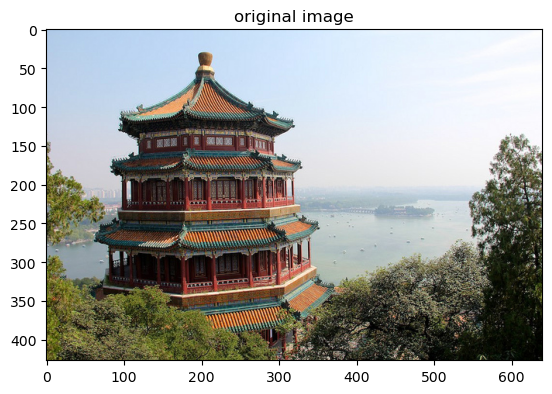

In [72]:
# losing image into TFRecords
from sklearn.datasets import load_sample_images
img=load_sample_images()["images"][0]
plt.imshow(img)
plt.title("original image")
plt.show()

In [73]:
data = tf.io.encode_jpeg(img)
example_with_image = Example(features=Features(feature={
    "image": Feature(bytes_list=BytesList(value=[data.numpy()]))}))
serialized_example = example_with_image.SerializeToString()

In [74]:
feature_description = { "image": tf.io.VarLenFeature(tf.string) }
example_with_image = tf.io.parse_single_example(serialized_example, feature_description)
decoded_img = tf.io.decode_jpeg(example_with_image["image"].values[0])

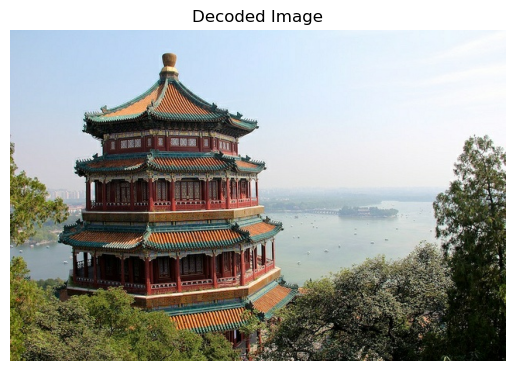

In [75]:
plt.imshow(decoded_img)
plt.title("Decoded Image")
plt.axis("off")
plt.show()

# handling list of lists

In [76]:
'''syntax="proto3"

message FeatureList {repeated Feature feature =1};
message FeatureLists {map<string,FeatureList> feature_list =2};
message SequenceExample{
    Features context =1,
    FeatureLists feature_lists =2;
};
'''

'syntax="proto3"\n\nmessage FeatureList {repeated Feature feature =1};\nmessage FeatureLists {map<string,FeatureList> feature_list =2};\nmessage SequenceExample{\n    Features context =1,\n    FeatureLists feature_lists =2;\n};\n'

In [77]:
FeatureList=tf.train.FeatureList
FeatureLists=tf.train.FeatureLists
SequenceExample=tf.train.SequenceExample

In [78]:
context=Features(feature={
    "author_id":Feature(int64_list=Int64List(value=[342])),
    "title":Feature(bytes_list=ByteList(value=[b"A",b"desert",b"place",b"."])),
    "pub_date":Feature(int64_list=Int64List(value=[1989,1990,1888]))
})

In [79]:
content = [["When", "shall", "we", "three", "meet", "again", "?"],
           ["In", "thunder", ",", "lightning", ",", "or", "in", "rain", "?"]]
comments = [["When", "the", "hurlyburly", "'s", "done", "."],
            ["When", "the", "battle", "'s", "lost", "and", "won", "."]]

In [80]:
def words_to_feature(words):
    return Feature(bytes_list=BytesList(value=[word.encode("utf-8")
                                               for word in words]))

content_features = [words_to_feature(sentence) for sentence in content]
comments_features = [words_to_feature(comment) for comment in comments]

In [81]:
sequence_example = SequenceExample(
    context=context,
    feature_lists=FeatureLists(feature_list={
        "content": FeatureList(feature=content_features),
        "comments": FeatureList(feature=comments_features)
    }))

In [82]:
sequence_example

context {
  feature {
    key: "author_id"
    value {
      int64_list {
        value: 342
      }
    }
  }
  feature {
    key: "pub_date"
    value {
      int64_list {
        value: 1989
        value: 1990
        value: 1888
      }
    }
  }
  feature {
    key: "title"
    value {
      bytes_list {
        value: "A"
        value: "desert"
        value: "place"
        value: "."
      }
    }
  }
}
feature_lists {
  feature_list {
    key: "comments"
    value {
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "hurlyburly"
          value: "\'s"
          value: "done"
          value: "."
        }
      }
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "battle"
          value: "\'s"
          value: "lost"
          value: "and"
          value: "won"
          value: "."
        }
      }
    }
  }
  feature_list {
    key: "content"
    value {
      feature {
  

# one hot encoding string types

# the feature API

In [83]:
vocab = ["<1H OCEAN", "INLAND", "NEAR OCEAN", "NEAR BAY", "ISLAND"]
indices = tf.range(len(vocab), dtype=tf.int64)

In [84]:
table_init = tf.lookup.KeyValueTensorInitializer(vocab, indices)
num_oov_buckets = 2
table = tf.lookup.StaticVocabularyTable(table_init, num_oov_buckets)

In [85]:
categories = tf.constant(["NEAR BAY", "DESERT", "INLAND", "INLAND"])

In [86]:
cat_indices = table.lookup(categories)

In [87]:
cat_one_hot = tf.one_hot(cat_indices, depth=len(vocab) + num_oov_buckets)

In [88]:
print(cat_one_hot)

tf.Tensor(
[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]], shape=(4, 7), dtype=float32)


In [89]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [90]:
fetch_housing_data()

In [91]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [92]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [93]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [94]:
x_train

array([[   2.6576    ,    5.        ,    5.93920596, ...,    2.41191067,
          34.44      , -117.22      ],
       [   1.6102    ,   14.        ,    4.48859316, ...,    3.48098859,
          32.74      , -117.1       ],
       [   3.7065    ,   36.        ,    5.23580786, ...,    2.90393013,
          34.89      , -117.05      ],
       ...,
       [   4.6023    ,    8.        ,    5.91729323, ...,    3.35338346,
          34.64      , -120.44      ],
       [   6.256     ,   36.        ,    6.25906736, ...,    2.88860104,
          33.82      , -118.37      ],
       [   4.1417    ,   38.        ,    4.95480226, ...,    2.62146893,
          37.74      , -122.41      ]])

In [95]:
housing_median_age = tf.feature_column.numeric_column("housing_median_age")

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [96]:
ocean_prox_vocab=['<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN']
ocean_proximity=tf.feature_column.categorical_column_with_vocabulary_list("ocean proximity",ocean_prox_vocab)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [97]:
ocean_proximity

VocabularyListCategoricalColumn(key='ocean proximity', vocabulary_list=('<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

# Feature for Parsing

In [98]:
median_house_value=tf.feature_column.numeric_column("median_house_value")

In [99]:
#columns=[housing_median_age,median_house_value]
columns = [
    tf.feature_column.numeric_column("housing_median_age"),
    tf.feature_column.numeric_column("median_house_value")
]
feature_discription=tf.feature_column.make_parse_example_spec(columns)
feature_discription

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


{'housing_median_age': FixedLenFeature(shape=(1,), dtype=tf.float32, default_value=None),
 'median_house_value': FixedLenFeature(shape=(1,), dtype=tf.float32, default_value=None)}

In [100]:
with tf.io.TFRecordWriter("my_data_with_feature.tfrecord") as f:
    for x,y in zip(x_train[:,1:2],y_train):
        example=Example(features=Features(feature={
            "housing_median_age":Feature(float_list=FloatList(value=[x.item()])),
            "median_house_value":Feature(float_list=FloatList(value=[y.item()]))
        }))
        f.write(example.SerializeToString())

In [101]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [102]:
# lets make a parser funtion that help us;
def parse_examples(serialized_example):
    examples=tf.io.parse_example(serialized_example,feature_discription)
    target=examples.pop("median_house_value")
    return examples,target

In [103]:
batch_size=32
dataset=tf.data.TFRecordDataset("my_data_with_feature.tfrecord")
dataset=dataset.repeat().shuffle(10000).batch(batch_size).map(parse_examples)

In [104]:
dataset

<_MapDataset element_spec=({'housing_median_age': TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)}, TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [105]:
columns_without_target=columns[:-1]
print(columns_without_target)
#print(columns)

[NumericColumn(key='housing_median_age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [106]:
'''
#lets train ourmodel
columns_without_target=columns[:-1]
   
model=keras.models.Sequential([
    keras.layers.DenseFeatures(feature_columns=columns_without_target),
    keras.layers.Dense(1)
])
model.compile(loss="mse",optimizer=keras.optimizers.SGD(learning_rate=0.01),metrics=["accuracy"])
'''

'\n#lets train ourmodel\ncolumns_without_target=columns[:-1]\n   \nmodel=keras.models.Sequential([\n    keras.layers.DenseFeatures(feature_columns=columns_without_target),\n    keras.layers.Dense(1)\n])\nmodel.compile(loss="mse",optimizer=keras.optimizers.SGD(learning_rate=0.01),metrics=["accuracy"])\n'

In [107]:
#model.fit(dataset,steps_per_epoch=len(x_train)//batch_size,epochs=5)

# word embeding 

In [108]:
vocab

['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']

In [109]:
num_oov_buckets

2

In [110]:
embeding_dim=2
embeding_int=tf.random.uniform([len(vocab)+num_oov_buckets,num_oov_buckets])

In [111]:
embeding_int

<tf.Tensor: shape=(7, 2), dtype=float32, numpy=
array([[0.68789124, 0.48447883],
       [0.9309944 , 0.252187  ],
       [0.73115396, 0.89256823],
       [0.94674826, 0.7493341 ],
       [0.34925628, 0.54718256],
       [0.26160395, 0.69734323],
       [0.11962581, 0.53484344]], dtype=float32)>

In [112]:
embeding_matrix=tf.Variable(embeding_int)

In [113]:
embeding_matrix

<tf.Variable 'Variable:0' shape=(7, 2) dtype=float32, numpy=
array([[0.68789124, 0.48447883],
       [0.9309944 , 0.252187  ],
       [0.73115396, 0.89256823],
       [0.94674826, 0.7493341 ],
       [0.34925628, 0.54718256],
       [0.26160395, 0.69734323],
       [0.11962581, 0.53484344]], dtype=float32)>

In [114]:
#lets encode the matrix
table

In [115]:
categories=tf.constant(["NEAR BAY", "DESERT", "INLAND", "INLAND"])
cat_indice=table.lookup(categories)

In [116]:
cat_indice

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([3, 5, 1, 1], dtype=int64)>

In [117]:
tf.nn.embedding_lookup(embeding_matrix,cat_indice)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[0.94674826, 0.7493341 ],
       [0.26160395, 0.69734323],
       [0.9309944 , 0.252187  ],
       [0.9309944 , 0.252187  ]], dtype=float32)>

In [118]:
embeding_matrix.shape

TensorShape([7, 2])

In [119]:
len(vocab)

5

In [120]:
# lets see the keras version of these
keras_emb=keras.layers.Embedding(input_dim=len(vocab)+num_oov_buckets,output_dim=embeding_matrix.shape[1])

In [121]:
keras_emb(cat_indice)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[-0.00788953, -0.04188276],
       [-0.0465881 ,  0.0244768 ],
       [-0.03037684,  0.03358206],
       [-0.03037684,  0.03358206]], dtype=float32)>

# Embeding words using Keras

In [124]:
regular_inputs=keras.layers.Input(shape=[8]) # the number inputs
categories=keras.layers.Input(shape=[],dtype=tf.string)  #this is the categorical inputs
cat_indices=keras.layers.Lambda(lambda cats: table.lookup(cats))(categories)
cat_embed=keras.layers.Embedding(input_dim=6,output_dim=2)(cat_indices)
encoded_inputs=keras.layers.concatenate([regular_inputs,cat_embed])
outputs=keras.layers.Dense(1)(encoded_inputs)
model=keras.models.Model(inputs=[regular_inputs,categories],
                        outputs=[outputs])